In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import platform
from matplotlib import rc

# '-' 부호가 제대로 표시되게 하는 설정
plt.rcParams['axes.unicode_minus'] = False

# 운영 체제마다 한글이 보이게 하는 설정
if platform.system() == 'Windows':
    path = "c:\\Windows\\Fonts\\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name() 
    rc('font', family=font_name) 
elif platform.system() == 'Darwin':  # 맥
    rc('font', family='AppleGothic')
elif platform.system() == 'Linux':  # 리눅스
    rc('font', family='NanumBarunGothic')

# 매직 명령어로 인라인 플로팅 설정
%matplotlib inline

### ★ 상관관계와 상관계수 
.corr() : 
상관관계는 두 변수 간의 관계를 파악하는데 사용되는 중요한 개념입니다. 상관관계는 두 변수 간의 선형적인 관계의 강도를 측정하는 지표로, -1부터 1까지의 값을 가집니다.

- 상관계수가 1에 가까울수록 두 변수 간에 강한 양의 선형 관계가 있음을 나타냅니다.
- 상관계수가 -1에 가까울수록 두 변수 간에 강한 음의 선형 관계가 있음을 나타냅니다.
- 상관계수가 0에 가까울수록 두 변수 간에 선형 관계가 거의 없거나 약한 관계가 있음을 나타냅니다.

따라서, 상관계수를 통해 두 변수 간의 관계를 이해하고 예측하는데 유용한 정보를 얻을  있습니다.


---
### 사용할 상관분석 데이터
---

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

engListening = [30, 60, 90, 31, 32, 69, 92, 99]
engReading = [40, 45, 60, 20, 15, 70, 60, 80]
engClass = [60, 120, 120, 60, 60, 180, 120, 120]
engScore = [70, 80, 90, 70, 71, 85, 90, 92]

df = pd.DataFrame({'영어듣기': engListening,'영어책읽기':engReading,'영어학원':engClass, '영어점수': engScore})

- 피어쓴 상관분석
---
#### 분석결과
1. ***영어듣기***와 ***영어점수***간의 상관계수가 0.995829로 가장 큰 선형 연관성을 보였다.
2. ***영어듣기***와 ***영어학원***간의 상관계수가 0.703028로 가장 작은 선형 상관성을 보였습니다.
3. ***영어책읽기***와 가장 큰 선형 상관성을 보이는 변수는 ***영어듣기*** 입니다.
4. ***영어책읽기***와 가장 작은 선형 상관성을 보이는 변수는 ***영어학원*** 입니다

In [3]:
df.corr(method='pearson')

,영어듣기,영어책읽기,영어학원,영어점수
영어듣기,1.000000,0.877201,0.703028,0.995829
영어책읽기,0.877201,1.000000,0.808755,0.894111
영어학원,0.703028,0.808755,1.000000,0.759453
영어점수,0.995829,0.894111,0.759453,1.000000


- 스피어만 상관분석
---
1. ***영어듣기***와 ***영어점수***간의 상관계수가 0.988024로 가장 큰 선형 연관성을 보였다.
2. ***영어듣기***와 ***영어학원***간의 상관계수가 0.717256로 가장 작은 선형 상관성을 보였습니다.
3. ***영어책읽기***와 가장 큰 선형 상관성을 보이는 변수는 ***영어학원*** 입니다.
4. ***영어책읽기***와 가장 작은 선형 상관성을 보이는 변수는 ***영어듣기*** 입니다

In [4]:
df.corr(method='spearman')

,영어듣기,영어책읽기,영어학원,영어점수
영어듣기,1.000000,0.826362,0.717256,0.988024
영어책읽기,0.826362,1.000000,0.852757,0.848500
영어학원,0.717256,0.852757,1.000000,0.725950
영어점수,0.988024,0.848500,0.725950,1.000000


- 켄달 상관분석
---
1. ***영어듣기***와 ***영어점수***간의 상관계수가 0.963624로 가장 큰 선형 연관성을 보였다.
2. ***영어듣기***와 ***영어학원***간의 상관계수가 0.563621로 가장 작은 선형 상관성을 보였습니다.
3. ***영어책읽기***와 가장 큰 선형 상관성을 보이는 변수는 ***영어학원*** 입니다.
4. ***영어책읽기***와 가장 작은 선형 상관성을 보이는 변수는 ***영어듣기*** 입니다

In [5]:
df.corr(method='kendall')

,영어듣기,영어책읽기,영어학원,영어점수
영어듣기,1.000000,0.618284,0.563621,0.963624
영어책읽기,0.618284,1.000000,0.750568,0.679366
영어학원,0.563621,0.750568,1.000000,0.584898
영어점수,0.963624,0.679366,0.584898,1.000000


---
###  상관분석 결과
1. 영어 듣기를 많이 할수록 영어 점수가 높다.
2. 영어 책을 많이 읽을 수록 영어 점수가 높다.

- 아래 두가지 경우가 해당 데이터를 분석하는데 적절하지 않는 이유
- 피어슨 : 데이터의 수가 적어 정규분포의 따르지 않음
- 켄달 : 점수들이 등급형태가 아니기에 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import warnings

# 경고 억제
warnings.filterwarnings("ignore")

# 임의 작성 데이터
x = [3000, 4200, 4000, 5000, 6000, 3800, 3500, 6200, 3900, 4500]
y = [60, 75, 70, 85, 90, 70, 65, 95, 70, 80]

# 데이터프레임 생성
df = pd.DataFrame({'x': x, 'y': y})

# OLS 회귀 분석 수행
fit = ols('y ~ x', data=df).fit()

# 회귀 분석 결과 출력
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     271.0
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.87e-07
Time:                        23:54:41   Log-Likelihood:                -20.111
No. Observations:                  10   AIC:                             44.22
Df Residuals:                       8   BIC:                             44.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.0004      2.926      9.913      0.0

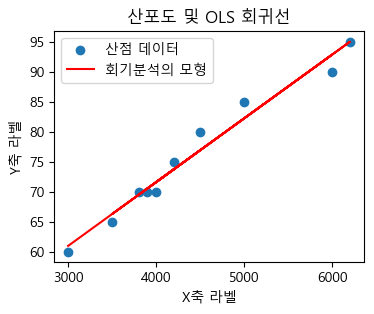

In [7]:
# 산포와 회귀분석의 모형
plt.figure(figsize=(4, 3))
plt.scatter(df['x'], df['y'], label='산점 데이터')
plt.plot(df['x'], fit.fittedvalues, color='red', label='회기분석의 모형')
plt.xlabel('X축 라벨')  # X축 라벨 추가
plt.ylabel('Y축 라벨')  # Y축 라벨 추가
plt.title('산포도 및 OLS 회귀선')  # 제목 추가
plt.legend()
plt.show()